## Lab 3: Cleaning and Analysis of Books Dataset


# Table of Contents 
<ol start="1">
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>


## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Load the appropriate libraries

In [163]:
#write your solution here
import pandas as pd


### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

In [164]:
#Read the data into a dataframe
#Inser your code
df = pd.read_csv("/content/goodreads.csv")

#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
####### 
df.head()


4.40 136455  0439023483  good_reads:book  \
0  4.41  16648  0439358078  good_reads:book   
1  3.56  85746  0316015849  good_reads:book   
2  4.23  47906  0061120081  good_reads:book   
3  4.23  34772  0679783261  good_reads:book   
4  4.25  12363  0446675539  good_reads:book   

  https://www.goodreads.com/author/show/153394.Suzanne_Collins    2008  \
0  https://www.goodreads.com/author/show/1077326....            2003.0   
1  https://www.goodreads.com/author/show/941441.S...            2005.0   
2  https://www.goodreads.com/author/show/1825.Har...            1960.0   
3  https://www.goodreads.com/author/show/1265.Jan...            1813.0   
4  https://www.goodreads.com/author/show/11081.Ma...            1936.0   

  /genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action  \
0  /genres/fantasy|/genres/young-adult|/genres/fi...                                                                                                                                                                                                      
1  /genres/young-adult|/genres/fantasy|/genres/ro...                                                                                                                                                                                                      
2  /genres/classics|/genres/fiction|/genres/histo...                                                                                                                                                                                                      
3  /genres/classics|/genres/fiction|/genres/roman...                                                                                                                                                                                                      
4  /genres/classics|/genres/historical-fiction|/g...                                                                                                                                                                                                      

                 dir01/2767052-the-hunger-games.html  2958974  \
0  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...  1284478   
1                          dir01/41865.Twilight.html  2579564   
2              dir01/2657.To_Kill_a_Mockingbird.html  2078123   
3                dir01/1885.Pride_and_Prejudice.html  1388992   
4                dir01/18405.Gone_with_the_Wind.html   645470   

             The Hunger Games (The Hunger Games, #1)  
0  Harry Potter and the Order of the Phoenix (Har...  
1                            Twilight (Twilight, #1)  
2                              To Kill a Mockingbird  
3                                Pride and Prejudice  
4                                 Gone with the Wind

Lets read the csv file with custom column descriptions specified in the problem statement.

In [165]:
#Read the data into a dataframe specifying column names
df = pd.read_csv("goodreads.csv", names = ["rating",'review_count',"isbn", "booktype","author_url","year","genre_urls","dir","rating_count","name"])
#Examine the first couple of rows of the dataframe
####### 
df.head()
#   Insert your code
####### 


rating review_count        isbn         booktype  \
0    4.40       136455  0439023483  good_reads:book   
1    4.41        16648  0439358078  good_reads:book   
2    3.56        85746  0316015849  good_reads:book   
3    4.23        47906  0061120081  good_reads:book   
4    4.23        34772  0679783261  good_reads:book   

                                          author_url    year  \
0  https://www.goodreads.com/author/show/153394.S...  2008.0   
1  https://www.goodreads.com/author/show/1077326....  2003.0   
2  https://www.goodreads.com/author/show/941441.S...  2005.0   
3  https://www.goodreads.com/author/show/1825.Har...  1960.0   
4  https://www.goodreads.com/author/show/1265.Jan...  1813.0   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir rating_count  \
0                dir01/2767052-the-hunger-games.html      2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                          dir01/41865.Twilight.html      2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                dir01/1885.Pride_and_Prejudice.html      1388992   

                                                name  
0            The Hunger Games (The Hunger Games, #1)  
1  Harry Potter and the Order of the Phoenix (Har...  
2                            Twilight (Twilight, #1)  
3                              To Kill a Mockingbird  
4                                Pride and Prejudice


### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content.

In [166]:
#Start by check the column data types
####### 
df.dtypes
#   Insert your code
####### 


rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

There are a couple more quick sanity checks to perform on the dataframe. 

In [167]:
#Come up with a few other important properties of the dataframe to check
####### 
#   Insert your code
df.isna().sum()
####### 
#we need to check for NaN values, empty strings...these kid of checks are kown as sanity checks.


rating            2
review_count      0
isbn            475
booktype          0
author_url        0
year              7
genre_urls       62
dir               0
rating_count      0
name              0
dtype: int64

**Question:** Was the data read correctly and values represented as we expected?

Answer : 

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

In [168]:
#Get a sense of how many missing values there are in the dataframe.
####### 
#   Insert your code
####### 
df.isna().sum()

rating            2
review_count      0
isbn            475
booktype          0
author_url        0
year              7
genre_urls       62
dir               0
rating_count      0
name              0
dtype: int64

In [169]:
#Try to locate where the missing values occur
####### 
#   Insert your code
####### 
df[df.rating.isna()]

rating review_count  isbn booktype author_url  year genre_urls  \
3643     NaN         None  None     None       None   NaN        NaN   
5282     NaN         None  None     None       None   NaN        NaN   

                                  dir rating_count  name  
3643  dir37/9658936-harry-potter.html         None  None  
5282     dir53/113138.The_Winner.html         None  None

How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?

dropna() which drops all the NaN, None values.


### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [170]:
#Treat the missing or invalid values in your dataframe
####### 
#   Insert your code
####### 
df = df.dropna(subset= ['rating','year'])


Ok so we have done some cleaning. Is it enough? 

In [171]:
#Check the column data types again
####### 
#   Insert your code
####### 
df.shape

(5993, 10)

Notice the float has not yet changed.
Ok so lets fix those types. If the type conversion fails, we now know we have further problems.

In [172]:
#Convert rating_count, review_count and year to int 
#######
# .Insert your code
#######
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

Final check

Some of the other colums that should be strings have NaN. 

In [173]:
#Insert Your code here

df['review_count'] = df['review_count'].astype('int')
#df['rating_count'] = df['rating_count'].astype('int')
df['year'] = df['year'].astype('int')
df.dtypes

rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated books? To determine this, you'll only need the data in two columns: `name` and `rating`. The task will be to sort these two columns by the value in `rating`.


---

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  


---

Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [174]:
#Get the first author_url
author = df['author_url'][0]
author

'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [175]:
#Test out some string operations to isolate the author name
####### 
#   Insert your code
#######
authordf = author.split(".")[-1]
authordf

'Suzanne_Collins'

In [176]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above
    ####### 
    #   Insert your code
def get_author(url):
    authordf = url.split(".")[-1]
    return authordf
    ####### 
    

#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author']=df.author_url.map(get_author)
df

rating  review_count        isbn         booktype  \
0       4.40        136455  0439023483  good_reads:book   
1       4.41         16648  0439358078  good_reads:book   
2       3.56         85746  0316015849  good_reads:book   
3       4.23         47906  0061120081  good_reads:book   
4       4.23         34772  0679783261  good_reads:book   
...      ...           ...         ...              ...   
5995    4.17          2226  0767913736  good_reads:book   
5996    3.99           775  1416909427  good_reads:book   
5997    3.78           540  1620612321  good_reads:book   
5998    3.91           281         NaN  good_reads:book   
5999    4.35            61  0786929081  good_reads:book   

                                             author_url  year  \
0     https://www.goodreads.com/author/show/153394.S...  2008   
1     https://www.goodreads.com/author/show/1077326....  2003   
2     https://www.goodreads.com/author/show/941441.S...  2005   
3     https://www.goodreads.com/author/show/1825.Har...  1960   
4     https://www.goodreads.com/author/show/1265.Jan...  1813   
...                                                 ...   ...   
5995  https://www.goodreads.com/author/show/44565.Ca...  2005   
5996  https://www.goodreads.com/author/show/151371.J...  2006   
5997  https://www.goodreads.com/author/show/5761314....  2012   
5998  https://www.goodreads.com/author/show/1201952....  2006   
5999  https://www.goodreads.com/author/show/1023510....  2001   

                                             genre_urls  \
0     /genres/young-adult|/genres/science-fiction|/g...   
1     /genres/fantasy|/genres/young-adult|/genres/fi...   
2     /genres/young-adult|/genres/fantasy|/genres/ro...   
3     /genres/classics|/genres/fiction|/genres/histo...   
4     /genres/classics|/genres/fiction|/genres/roman...   
...                                                 ...   
5995  /genres/history|/genres/non-fiction|/genres/bi...   
5996  /genres/young-adult|/genres/realistic-fiction|...   
5997  /genres/contemporary|/genres/romance|/genres/y...   
5998  /genres/religion|/genres/islam|/genres/religio...   
5999  /genres/fiction|/genres/fantasy|/genres/magic|...   

                                                    dir rating_count  \
0                   dir01/2767052-the-hunger-games.html      2958974   
1     dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                             dir01/41865.Twilight.html      2579564   
3                 dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                   dir01/1885.Pride_and_Prejudice.html      1388992   
...                                                 ...          ...   
5995                dir60/78508.The_River_of_Doubt.html        16618   
5996                             dir60/259068.Shug.html         6179   
5997                         dir60/13503247-flawed.html         2971   
5998                                 dir60/2750008.html         3083   
5999  dir60/66677.Legacy_of_the_Drow_Collector_s_Edi...         3982   

                                                   name           author  
0               The Hunger Games (The Hunger Games, #1)  Suzanne_Collins  
1     Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling  
2                               Twilight (Twilight, #1)  Stephenie_Meyer  
3                                 To Kill a Mockingbird       Harper_Lee  
4                                   Pride and Prejudice      Jane_Austen  
...                                                 ...              ...  
5995                                 The River of Doubt  Candice_Millard  
5996                                               Shug        Jenny_Han  
5997                                             Flawed     Kate_Avelynn  
5998              Ø£Ø³Ø¹Ø¯ Ø§Ù
Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ
    A_id_al_Qarni  
5999  Legacy of the Drow Collector's Edition (Legacy...    R_A_Salvatore  

[5993 rows x 11 columns]



## **4. EDA Exploratory Data Analysis**

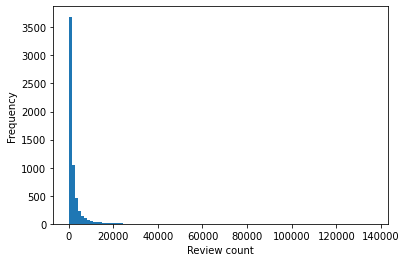

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline
x = df.review_count
plt.hist(x, bins = 100)
plt.xlabel("Review count")
plt.ylabel("Frequency")
plt.show()

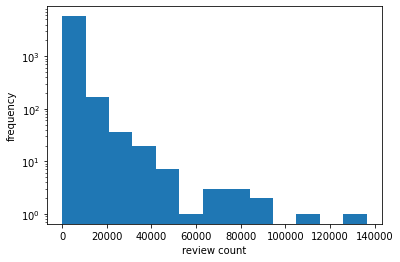

In [178]:
x = df.review_count
plt.hist(x, bins = 13, log = True)
plt.xlabel("review count")
plt.ylabel("frequency")
plt.show()


## Part 4:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book."
 

---

In [179]:

for key, value in df.groupby('year', sort = True):
  yeardf = value[value.rating_count == value.rating_count.max()]
  print(yeardf, yeardf)
  break

      rating  review_count        isbn         booktype  \
1398     3.6          1644  0141026286  good_reads:book   

                                             author_url  year  \
1398  https://www.goodreads.com/author/show/5158478.... -1500   

                                             genre_urls  \
1398  /genres/religion|/genres/literature|/genres/an...   

                                         dir rating_count  \
1398  dir14/19351.The_Epic_of_Gilgamesh.html        42026   

                       name     author  
1398  The Epic of Gilgamesh  Anonymous         rating  review_count        isbn         booktype  \
1398     3.6          1644  0141026286  good_reads:book   

                                             author_url  year  \
1398  https://www.goodreads.com/author/show/5158478.... -1500   

                                             genre_urls  \
1398  /genres/religion|/genres/literature|/genres/an...   

                                         dir rating_count

For example, we can determine the "best book" by year! Determine the best books in each year from 2000

In [180]:
#Deterime best book each year based on rating.
#yeardf = df['year']>=2000
yeardf = df.groupby('year', sort= True)

In [181]:
bestbook = yeardf.get_group(2005)
bestbookdf = value[value.rating_count == value.rating_count.max()]
print(bestbookdf.name,bestbookdf.rating_count)

1398    The Epic of Gilgamesh
Name: name, dtype: object 1398    42026
Name: rating_count, dtype: object


In [182]:
yeardf =df.groupby('year', sort=True)
print(yeardf)

In [183]:
yeardf.first()

rating  review_count        isbn         booktype  \
year                                                       
-1500    3.60          1644  0141026286  good_reads:book   
-800     3.68          5785  0143039954  good_reads:book   
-560     4.03           890  0192840509  good_reads:book   
-512     3.92          3559  1590302257  good_reads:book   
-500     4.06          1087  0140449183  good_reads:book   
...       ...           ...         ...              ...   
 2010    4.39          6212  1595142509  good_reads:book   
 2011    4.34         82098  0062024035  good_reads:book   
 2012    4.43        112279  0525478817  good_reads:book   
 2013    4.58         15195  1406321346  good_reads:book   
 2014    4.85            26  1491732954  good_reads:book   

                                              author_url  \
year                                                       
-1500  https://www.goodreads.com/author/show/5158478....   
-800     https://www.goodreads.com/author/show/903.Homer   
-560   https://www.goodreads.com/author/show/12452.Aesop   
-512   https://www.goodreads.com/author/show/1771.Sun...   
-500   https://www.goodreads.com/author/show/5158478....   
...                                                  ...   
 2010  https://www.goodreads.com/author/show/137902.R...   
 2011  https://www.goodreads.com/author/show/4039811....   
 2012  https://www.goodreads.com/author/show/1406384....   
 2013  https://www.goodreads.com/author/show/150038.C...   
 2014  https://www.goodreads.com/author/show/8189303....   

                                              genre_urls  \
year                                                       
-1500  /genres/religion|/genres/literature|/genres/an...   
-800   /genres/classics|/genres/fiction|/genres/poetr...   
-560   /genres/classics|/genres/childrens|/genres/lit...   
-512   /genres/non-fiction|/genres/politics|/genres/c...   
-500   /genres/classics|/genres/spirituality|/genres/...   
...                                                  ...   
 2010  /genres/fantasy|/genres/paranormal|/genres/par...   
 2011  /genres/young-adult|/genres/science-fiction|/g...   
 2012  /genres/young-adult|/genres/book-club|/genres/...   
 2013  /genres/fantasy|/genres/young-adult|/genres/fa...   
 2014                                    /genres/fiction   

                                              dir rating_count  \
year                                                             
-1500      dir14/19351.The_Epic_of_Gilgamesh.html        42026   
-800                  dir01/1381.The_Odyssey.html       560248   
-560              dir14/21348.Aesop_s_Fables.html        71259   
-512              dir07/10534.The_Art_of_War.html       114619   
-500           dir08/99944.The_Bhagavad_Gita.html        31634   
...                                           ...          ...   
 2010             dir02/6479259-spirit-bound.html       180067   
 2011               dir01/13335037-divergent.html      1127983   
 2012  dir01/11870085-the-fault-in-our-stars.html      1150626   
 2013      dir03/18335634-clockwork-princess.html       130161   
 2014      dir10/22242097-honor-and-polygamy.html           97   

                                                name           author  
year                                                                   
-1500                          The Epic of Gilgamesh        Anonymous  
-800                                     The Odyssey            Homer  
-560                                  Aesop's Fables            Aesop  
-512                                  The Art of War          Sun_Tzu  
-500                               The Bhagavad Gita        Anonymous  
...                                              ...              ...  
 2010             Spirit Bound (Vampire Academy, #5)    Richelle_Mead  
 2011                      Divergent (Divergent, #1)    Veronica_Roth  
 2012                         The Fault in Our Stars       John_Green  
 2013  Clockw

In [184]:
yeardf.groups

{-1500: [1398], -800: [47, 246], -560: [1397], -512: [674], -500: [746], -458: [1815], -442: [777], -440: [2527], -431: [1428], -429: [629], -411: [2078, 3757], -400: [1233, 1882, 3133], -390: [4475], -380: [455], -370: [4402], -360: [5367], -350: [3274], -29: [596], 4: [4717], 8: [1330], 13: [1752], 100: [2329], 121: [4843], 130: [1860], 158: [4534], 174: [1169], 200: [1622], 201: [5404], 213: [2564], 397: [1393], 632: [301], 800: [327], 900: [569], 968: [4953], 1002: [2567], 1008: [852], 1010: [5439], 1100: [1653], 1106: [5798], 1140: [5831], 1200: [4691], 1215: [3311], 1220: [4054], 1300: [2863], 1314: [363], 1321: [132, 5354], 1348: [913], 1386: [1878, 4422], 1390: [167, 3272], 1391: [5542], 1485: [1613], 1516: [1692], 1522: [2266, 3894], 1532: [384, 3753], 1572: [2177, 4637], 1589: [5705], 1590: [774], 1592: [3954], 1595: [161], 1597: [14, 1204], 1599: [495, 539, 1144], 1600: [531, 2687], 1601: [489], 1602: [3097], 1603: [245, 5361], 1604: [2384], 1605: [82, 248], 1606: [2454], 16

In [185]:
ydf = yeardf.get_group(2013)
ydf.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


rating                                                       4.93
review_count                                                47308
booktype                                          good_reads:book
author_url      https://www.goodreads.com/author/show/88506.Jo...
year                                                         2013
dir                        dir60/17899696-the-edge-of-always.html
rating_count                                                99925
name                                    ÙØ§Ø¯Ù Ø§ÙØ³ÙØ§Ø±Ø§Øª
author                                                          _
dtype: object

In [186]:
yeardf['rating'].mean()

year
-1500    3.600000
-800     3.845000
-560     4.030000
-512     3.920000
-500     4.060000
           ...   
 2010    4.046341
 2011    4.067166
 2012    4.154169
 2013    4.200978
 2014    4.349655
Name: rating, Length: 293, dtype: float64

In [187]:
yeardf[['rating','rating_count']].max()

rating rating_count
year                      
-1500    3.60        42026
-800     4.01       560248
-560     4.03        71259
-512     3.92       114619
-500     4.06        31634
...       ...          ...
 2010    4.93          996
 2011    5.00         9980
 2012    5.00        99108
 2013    4.93        99925
 2014    5.00           97

[293 rows x 2 columns]

In [188]:
yeardf.agg({"rating":"mean","rating_count":"max"})

rating rating_count
year                        
-1500  3.600000        42026
-800   3.845000       560248
-560   4.030000        71259
-512   3.920000       114619
-500   4.060000        31634
...         ...          ...
 2010  4.046341          996
 2011  4.067166         9980
 2012  4.154169        99108
 2013  4.200978        99925
 2014  4.349655           97

[293 rows x 2 columns]

In [189]:
yeardf.agg(['mean','median','max'])

rating              review_count                   rating_count  \
           mean median   max         mean  median     max           mean   
year                                                                       
-1500  3.600000  3.600  3.60  1644.000000  1644.0    1644   4.202600e+04   
-800   3.845000  3.845  4.01  3075.000000  3075.0    5785   2.801242e+10   
-560   4.030000  4.030  4.03   890.000000   890.0     890   7.125900e+04   
-512   3.920000  3.920  3.92  3559.000000  3559.0    3559   1.146190e+05   
-500   4.060000  4.060  4.06  1087.000000  1087.0    1087   3.163400e+04   
...         ...    ...   ...          ...     ...     ...            ...   
 2010  4.046341  4.030  4.93  2695.466877  1205.0   83643            inf   
 2011  4.067166  4.085  5.00  3165.788770  1347.5   82098            inf   
 2012  4.154169  4.160  5.00  3374.735211  1423.0  112279            inf   
 2013  4.200978  4.230  4.93  2477.271739  1346.5   47308            inf   
 2014  4.349655  4.370  5.00  1532.436782   273.0   11011  1.122358e+297   

                         
         median     max  
year                     
-1500   42026.0   42026  
-800   297685.5  560248  
-560    71259.0   71259  
-512   114619.0  114619  
-500    31634.0   31634  
...         ...     ...  
 2010   17762.0     996  
 2011   15761.5    9980  
 2012   15955.0   99108  
 2013   11233.0   99925  
 2014     792.0      97  

[293 rows x 9 columns]

Try this for few other definitions of the "best book" using `.groupby`.

## Part 5:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?


---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [190]:
#Explore different ways to visualize information about the genres in the dataframe
####### 
#   Insert your code
####### 
#genre
newdf= df.dropna(subset=['genre_urls'])
newdf.shape

(5934, 11)

In [191]:
firstgenre= newdf['genre_urls'][0]
print(firstgenre)

/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action


In [192]:
genresdf = firstgenre.split("/genres/")[1:]

In [193]:
genres = [ genresdf.replace("|","")for genresdf in genresdf]
genres

['young-adult',
 'science-fiction',
 'dystopia',
 'fantasy',
 'science-fiction',
 'romance',
 'adventure',
 'book-club',
 'young-adult',
 'teen',
 'apocalyptic',
 'post-apocalyptic',
 'action']

In [194]:
#plot the data here
genres="".join(genresdf)
genres
#genres = [genre.replace]

'young-adult|science-fiction|dystopia|fantasy|science-fiction|romance|adventure|book-club|young-adult|teen|apocalyptic|post-apocalyptic|action'

In [195]:
def get_genre(url):
  genres = url.split("/genres/")[1:]
  genres="".join(genres)
  return genres

In [196]:
newdf['genre']= newdf.genre_urls.map(get_genre)
newdf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


rating  review_count        isbn         booktype  \
0    4.40        136455  0439023483  good_reads:book   
1    4.41         16648  0439358078  good_reads:book   
2    3.56         85746  0316015849  good_reads:book   
3    4.23         47906  0061120081  good_reads:book   
4    4.23         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir rating_count  \
0                dir01/2767052-the-hunger-games.html      2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                          dir01/41865.Twilight.html      2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                dir01/1885.Pride_and_Prejudice.html      1388992   

                                                name           author  \
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins   
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling   
2                            Twilight (Twilight, #1)  Stephenie_Meyer   
3                              To Kill a Mockingbird       Harper_Lee   
4                                Pride and Prejudice      Jane_Austen   

                                               genre  
0  young-adult|science-fiction|dystopia|fantasy|s...  
1  fantasy|young-adult|fiction|fantasy|magic|chil...  
2  young-adult|fantasy|romance|paranormal|vampire...  
3  classics|fiction|historical-fiction|academic|s...  
4  classics|fiction|romance|historical-fiction|li...

In [197]:
set_genre = set()

In [198]:
for genres in newdf.genre:
  set_genre.update(genres.split("|"))
print(len(set_genre))

537


In [199]:
for genre in set_genre:
  newdf[genre] = [genre in row.split("|") for row in newdf.genre]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [200]:
genredf = newdf[list(set_genre)]
genredf.head()

graphic-novels  sequential-art  poetry  sports  crime  14th-century   cats  \
0           False           False   False   False  False         False  False   
1           False           False   False   False  False         False  False   
2           False           False   False   False  False         False  False   
3           False           False   False   False  False         False  False   
4           False           False   False   False  False         False  False   

   college   love  chick-lit  ...  animals  space-opera  sexuality  genetics  \
0    False  False      False  ...    False        False      False     False   
1    False  False      False  ...    False        False      False     False   
2    False  False      False  ...    False        False      False     False   
3    False  False      False  ...    False        False      False     False   
4    False  False      False  ...    False        False      False     False   

   belgium   mine  favorites  danish  history-of-science    fae  
0    False  False      False   False               False  False  
1    False  False      False   False               False  False  
2    False  False      False   False               False  False  
3    False  False      False   False               False  False  
4    False  False      False   False               False  False  

[5 rows x 537 columns]

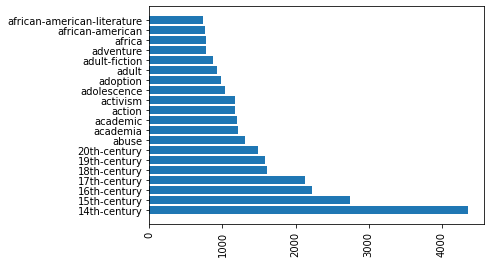

In [201]:
result = genredf.sum()
result = result.sort_values(ascending = False)
x = sorted(set_genre)[:20]
y = result[:20]
plt.xticks(rotation = 90)
plt.barh(x,y)
plt.show()